In [407]:
# USE val ENVOIRMENT
import os
from evaldet import Tracks
from evaldet import mot
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd


#pd.set_option('precision', 2)

print(plt.rcParams["figure.figsize"])

[6.4, 4.8]


In [408]:
YOLO_LETTER = "n"
YOLO_VIDEO = "ant_subset_1-028"
YOLO_DATASET = "Marc"
EVAL_NUM = "8"

gt_tracks = Tracks.from_mot("/mnt/work/users/marc.corretge/GT/ant_subset_1-024_GT.txt")

MOT_PATH = r"E:\TFG\manualTrackAnnotation\variant_iouThreshold_split\resultsEvalPerMemoria_iouSplit-0.50\ant_subset_1-024_YOLOv8n_Marc_MOT_OCSORT_ct_dist.txt"


#  Final declaracio de variables
#################################################################################################################################
#################################################################################################################################
#################################################################################################################################
#################################################################################################################################
#  Inici del codi



#OUT_MOT_PATH_151 = MOT_PATH.replace(".csv", "_151.txt")
format = MOT_PATH.split('.')[-1]
OUT_MOT_PATH_CLEAN = MOT_PATH.replace("." + format, "_clean." + format)

with open(MOT_PATH, 'r') as fin:
        data = fin.read().splitlines(True)
    
if data[0].split(',')[0] == 'frame':
    MOT = data[1:]
else:
    MOT = data  

MOT = np.array([i.split(',') for i in MOT]).astype(float)

# Crear una máscara para identificar las filas que cumplen con las condiciones dadas
mask = np.logical_and(MOT[:,2] == -1, MOT[:,4] == 0)
# Filtrar el array MOT excluyendo las filas que cumplen con las condiciones
MOT = MOT[~mask]

#mask = MOT[:, 0] <= 151
#MOT = MOT[mask]

a = 0
b = 0
c = 0
#with open(OUT_MOT_PATH_151, "w") as f:
#    for i in MOT:
#        if i[2] == -1 and i[3] == -1:
#            pass
#            #f.write(f"{int(i[0])},{int(i[1])},{i[2]},{i[3]},{i[4]},{i[5]},{i[6]},{i[7]},{i[8]},{i[9]}\n")
#        else:
#            a += 1
#            b += i[5]
#            c += i[4]
#            f.write(f"{int(i[0])},{int(i[1])},{i[2]},{i[3]},{i[4]},{i[5]},{i[6]},{int(i[7])},{int(i[8])},{int(i[9])}\n")
with open(OUT_MOT_PATH_CLEAN, "w") as f:
    for i in MOT:
        if i[2] == -1 and i[3] == -1:
            pass
            #f.write(f"{int(i[0])},{int(i[1])},{i[2]},{i[3]},{i[4]},{i[5]},{i[6]},{i[7]},{i[8]},{i[9]}\n")
        else:
            a += 1
            b += i[5]
            c += i[4]
            f.write(f"{int(i[0])},{int(i[1])},{i[2]},{i[3]},{i[4]},{i[5]},{i[6]},{int(i[7])},{int(i[8])},{int(i[9])}\n")
print(a, b/a, c/a)

34641 69.39211220461284 70.15364920845235


In [409]:

#iter = "iou_threshold=0.05"

#tracks = Tracks.from_mot(OUT_MOT_PATH_151)
#os.remove(OUT_MOT_PATH_151)
tracks = Tracks.from_mot(OUT_MOT_PATH_CLEAN)
os.remove(OUT_MOT_PATH_CLEAN)

#print("E:/TFG/code/EVALs/others/" + iter + "/all_ants_0-007_OCSORT_" + MODEL_YOLO + "-151.csv")
#tracks = Tracks.from_mot("E:/TFG/code/AntTracking/YOLO_TRACKING/2EVAL/151 frames/" + YOLO_LETTER + "/all_ants_0-007_YOLOTRACKING-YOLOv8" + YOLO_LETTER + "_best_Marc_MOT-OCSORT-151.csv")

#tracks = Tracks.from_mot("C:/Users/marcc/Downloads/STRONGSORT/" + MODEL_YOLO + "/all_ants_0-007_STRONGSORT_" + MODEL_YOLO + "-151.csv")


eval_obj = mot.MOTMetrics(clearmot_dist_threshold=0.5, id_dist_threshold=0.5)

In [410]:
metrics = eval_obj.compute(gt_tracks, tracks, clearmot_metrics=True, id_metrics=True, hota_metrics=True)
metrics['clearmot']['MOTP'] = 1 - metrics['clearmot']['MOTP']

In [411]:
print('CLEARMOT')
print(pd.DataFrame(metrics['clearmot'], index=['values']))
print('-' * 10)
print('IDs')
print(pd.DataFrame(metrics['id'], index=['values']))
print('-' * 10)
print('HOTA')
print(pd.DataFrame({k : v for k, v in metrics['hota'].items() if k in ['HOTA', 'DetA', 'AssA', 'LocA']}, index=['values']))

CLEARMOT
            MOTP      MOTA  FP_CLEAR  FN_CLEAR  IDSW
values  0.997858  0.984488       336       184    15
----------
IDs
         IDTP  IDFP  IDFN     IDP       IDR      IDF1
values  33193  1448  1296  0.9582  0.962423  0.960307
----------
HOTA
            HOTA      DetA     AssA      LocA
values  0.958818  0.982916  0.93531  0.997981


In [412]:
print('-' * 10)
print('HOTA alpha')

new = '_\\'
hota_alpha = pd.DataFrame({fr"${k.replace('_', new)}$" : v for k, v in metrics['hota'].items() if k not in ['HOTA', 'DetA', 'AssA', 'LocA', 'alphas_HOTA']}, index=metrics['hota']['alphas_HOTA'])
print(hota_alpha)

----------
HOTA alpha
      $HOTA_\alpha$  $DetA_\alpha$  $AssA_\alpha$  $LocA_\alpha$
0.05       0.949008       0.972494       0.926089       0.999898
0.10       0.950941       0.974691       0.927770       0.999812
0.15       0.952529       0.976385       0.929255       0.999707
0.20       0.953885       0.977799       0.930556       0.999585
0.25       0.954632       0.978648       0.931206       0.999488
0.30       0.955299       0.979668       0.931537       0.999342
0.35       0.956559       0.980973       0.932753       0.999077
0.40       0.958024       0.982563       0.934098       0.998714
0.45       0.959713       0.984214       0.935823       0.998310
0.50       0.960454       0.985182       0.936347       0.998018
0.55       0.961060       0.985467       0.937258       0.997960
0.60       0.961217       0.985581       0.937454       0.997796
0.65       0.961304       0.985695       0.937515       0.997673
0.70       0.962909       0.987579       0.938854       0.996858
0.7

Text(0.5, 1.0, 'HOTA alpha (ant_subset_1-028_YOLOv8n_Marc)')

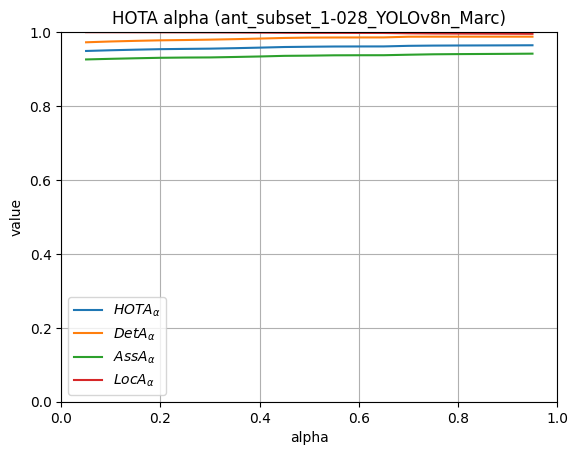

In [413]:
fig = hota_alpha.plot.line()
fig.grid(True)
fig.set_xlim(0, 1)
fig.set_ylim(0, 1)
fig.set_xlabel('alpha')
fig.set_ylabel('value')
fig.set_title('HOTA alpha (' + YOLO_VIDEO + "_YOLOv8" + YOLO_LETTER + "_" + YOLO_DATASET + ')')